✅ First five records:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Dataset Shape: (1000, 8)

🕵️ Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

✅ Missing values after handling:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

🔍 Number of duplicate rows: 0
✅ Duplicates removed successfully.

New dataset shape: (1000, 8)

✅ Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
✅ Numeric Columns: ['math score', 'reading score', 'writing score']


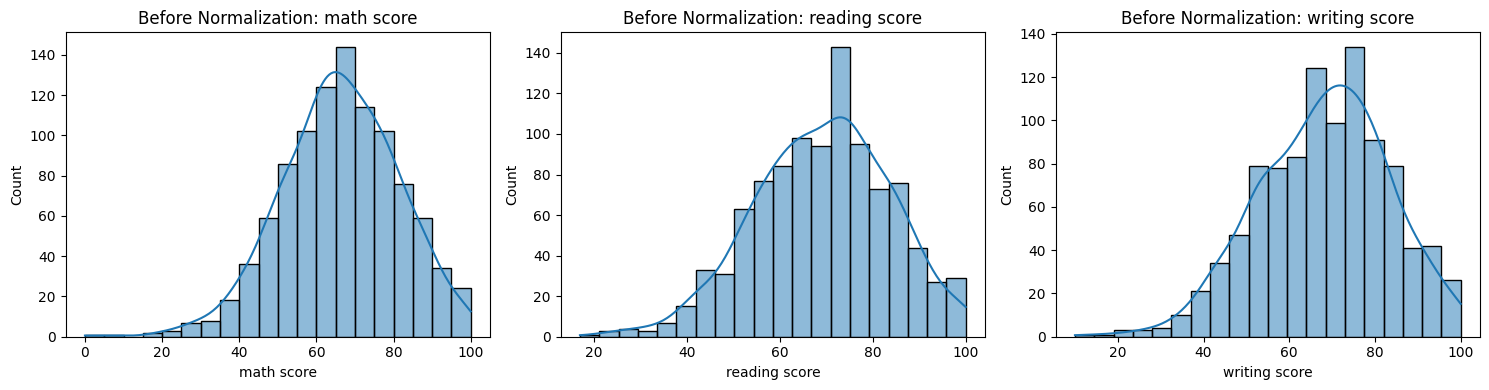

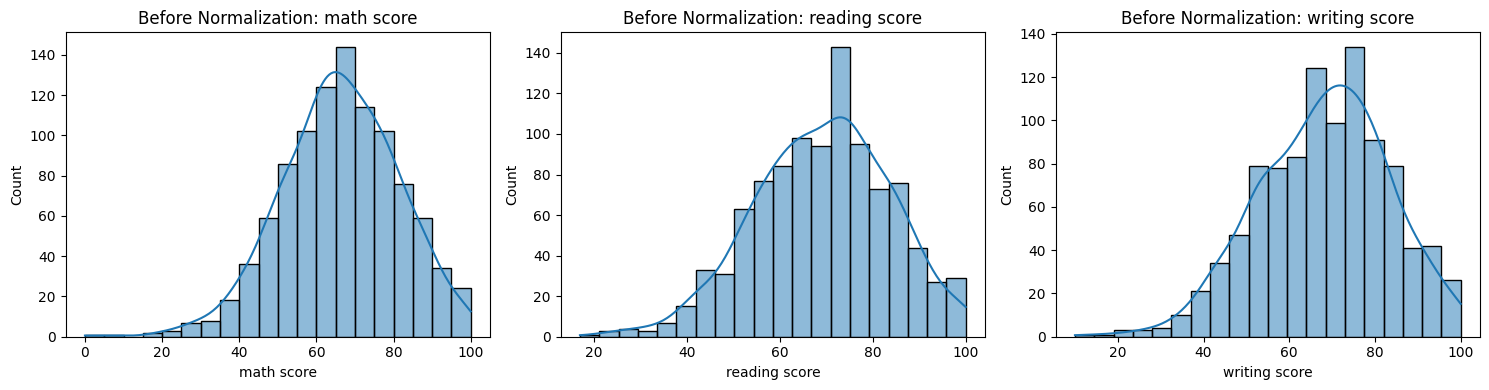

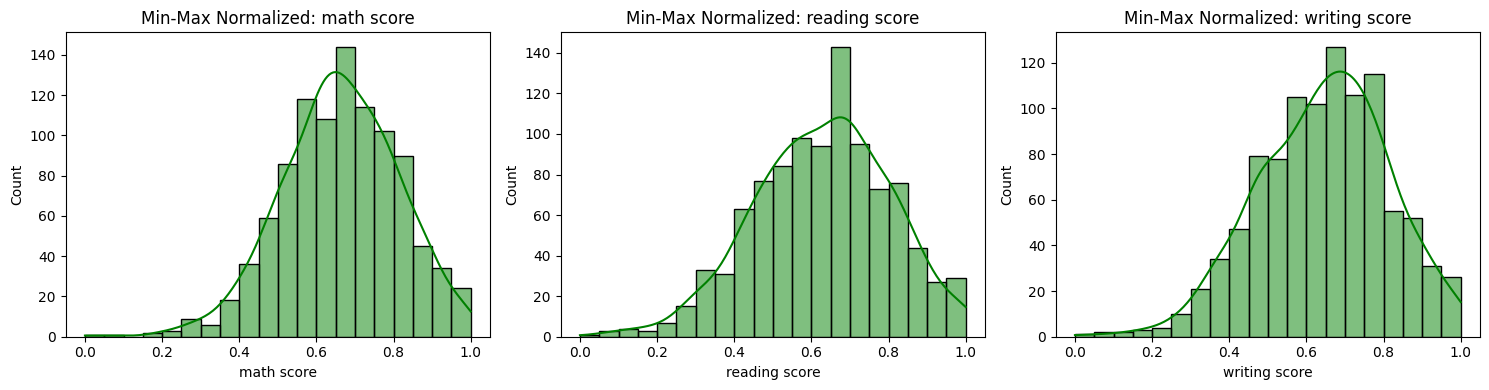

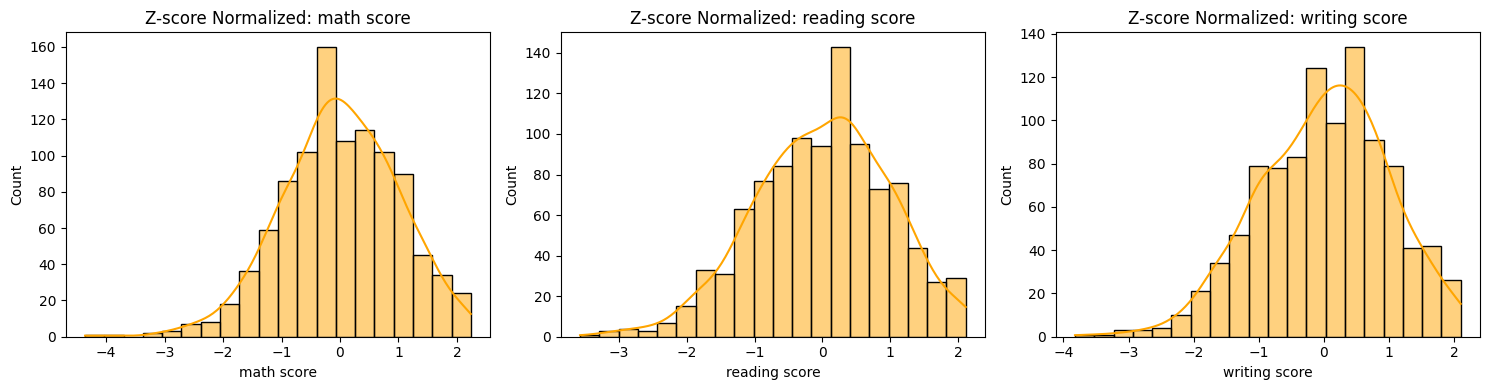

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/StudentsPerformance.csv')

# Display first few rows
print("✅ First five records:")
display(df.head())

# Display dataset shape
print("\nDataset Shape:", df.shape)
# Check for missing values
missing_info = df.isnull().sum()
print("\n🕵️ Missing Values:\n", missing_info)

# Fill missing values (using mode for categorical columns)
df.fillna({
    'parental level of education': df['parental level of education'].mode()[0],
    'lunch': df['lunch'].mode()[0]
}, inplace=True)

# Recheck missing values
print("\n✅ Missing values after handling:\n", df.isnull().sum())
# Find duplicate rows
duplicates = df[df.duplicated()]
print("\n🔍 Number of duplicate rows:", duplicates.shape[0])

# Drop duplicates
df.drop_duplicates(inplace=True)
print("✅ Duplicates removed successfully.")

# Verify new shape
print("\nNew dataset shape:", df.shape)

# Convert string columns to lowercase and strip spaces
categorical_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Define numeric columns
numeric_cols = ['math score', 'reading score', 'writing score']

print("\n✅ Categorical Columns:", categorical_cols)
print("✅ Numeric Columns:", numeric_cols)

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Before Normalization: {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Before Normalization: {col}')
plt.tight_layout()
plt.show()

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# Visualize after normalization
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_minmax[col], kde=True, bins=20, color='green')
    plt.title(f'Min-Max Normalized: {col}')
plt.tight_layout()
plt.show()

# Apply Standard Scaling (Z-score)
zscore_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[numeric_cols] = zscore_scaler.fit_transform(df[numeric_cols])

# Visualize after Z-score normalization
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_zscore[col], kde=True, bins=20, color='orange')
    plt.title(f'Z-score Normalized: {col}')
plt.tight_layout()
plt.show()
